# Genetic Algorithm Tessellation
In this notebook, we'll use genetic algorithms to create tessellations!

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..") # Move execution to root dir

In [2]:
from enum import Enum, auto
from typing import Callable, Iterator, Optional

import numpy as np
from matplotlib import pyplot as plt 
from leap_ec import ops, probe
from leap_ec.algorithm import generational_ea
from leap_ec.representation import Representation

from tessellation.draw import MPLDrawer
from tessellation.procgen.generator import ALL_ACTIONS, Action, Generator 
from tessellation.procgen.ga.genome import TessellationDecoder
from tessellation.procgen.ga.heuristics import (
    count_number_points_heuristic, 
    bottom_top_even_heuristic,
    duplicated_points_heuristic,
)
from tessellation.procgen.ga.mutate import apply_mutation, substitute_action, insert_action, delete_action
from tessellation.procgen.ga.problem import TessellationProblem, initialize_genome

## Configuration

In [3]:
# Proc gen constants
SEED = 32
SIDE_LEN = 100

# Genetic Algorithm config
SIDE_LEN = 100
SUBSTITUTION_PROB, INSERTION_PROB, DELETION_PROB = 0.1, 0.1, 0.1
POP_SIZE = 10
MAX_GENERATIONS = 100
ACTION_PROBS = np.ones(len(Action)) / len(Action)

# Draw config
CMAP = "gray"
drawer = MPLDrawer(CMAP)    

## Genetic Algorithm Tessellation
We'll be using the LEAP package for our genetic algorithms.

### Simple test
Let's start by trying out the simplest form of GA - simple real-valued function optimization.

In [4]:
from leap_ec.simple import ea_solve

def f(x):
    """A real-valued function to optimized."""
    return sum(x)**2

ea_solve(f, bounds=[(-5.12, 5.12) for _ in range(5)], maximize=True)

step,bsf
0,249.30601770997137
1,354.7690915374223
2,508.40492235140675
3,508.40492235140675
4,508.40492235140675
5,510.390528444402
6,510.390528444402
7,586.0587950289706
8,586.0587950289706
9,586.0587950289706
10,586.0587950289706
11,588.2154329791335
12,617.9720087438548
13,617.9720087438548
14,617.9720087438548
15,655.3600000000001
16,655.3600000000001
17,655.3600000000001
18,655.3600000000001
19,655.3600000000001
20,655.3600000000001
21,655.3600000000001
22,655.3600000000001
23,655.3600000000001
24,655.3600000000001
25,655.3600000000001
26,655.3600000000001
27,655.3600000000001
28,655.3600000000001
29,655.3600000000001
30,655.3600000000001
31,655.3600000000001
32,655.3600000000001
33,655.3600000000001
34,655.3600000000001
35,655.3600000000001
36,655.3600000000001
37,655.3600000000001
38,655.3600000000001
39,655.3600000000001
40,655.3600000000001
41,655.3600000000001
42,655.3600000000001
43,655.3600000000001
44,655.3600000000001
45,655.3600000000001
46,655.3600000000001
47,655.36000

array([-5.12, -5.12, -5.12, -5.12, -5.12])

### Build out Genetic Algorithm

In [5]:
problem = TessellationProblem(
    heuristic_fns=[
        count_number_points_heuristic,
        bottom_top_even_heuristic,
        duplicated_points_heuristic,
    ], 
    side_len=SIDE_LEN
)

representation = Representation(
    decoder=TessellationDecoder(),
    initialize=lambda: initialize_genome(problem) 
)

In [7]:
final_pop = generational_ea(
    max_generations=MAX_GENERATIONS, 
    pop_size=POP_SIZE,
    problem=problem,
    representation=representation,

    # The operator pipeline
    pipeline=[
        # Select parents via tournament_selection selection
        ops.tournament_selection,
        
        ops.clone,  # Copy them (just to be safe)
        
        lambda individual_iterator: apply_mutation(
            substitute_action, individual_iterator, fn_kwargs={"action_probs": ACTION_PROBS}
        ),
        lambda individual_iterator: apply_mutation(
            insert_action, individual_iterator, fn_kwargs={"action_probs": ACTION_PROBS}
        ),
        lambda individual_iterator: apply_mutation(delete_action, individual_iterator),
        
        # Crossover with a 40% chance of swapping each gene
        # ops.UniformCrossover(p_swap=0.4),
        
        ops.evaluate,  # Evaluate fitness
        
        # Collect offspring into a new population
        ops.pool(size=POP_SIZE),
        
        probe.BestSoFarProbe()  # Print the BSF
    ]
)

step,bsf
0,88.0
1,89.0
2,89.0
3,90.0
4,94.0
5,96.0
6,99.0
7,99.0
8,99.0
9,100.0
10,100.0
11,100.0
12,104.0
13,104.0
14,104.0
15,104.0
16,104.0
17,104.0
18,104.0
19,104.0
20,104.0
21,104.0
22,104.0
23,104.0
24,104.0
25,104.0
26,104.0
27,104.0
28,104.0
29,104.0
30,104.0
31,104.0
32,104.0
33,104.0
34,104.0
35,104.0
36,104.0
37,104.0
38,104.0
39,104.0
40,104.0
41,106.0
42,111.0
43,111.0
44,121.0
45,121.0
46,121.0
47,121.0
48,121.0
49,121.0
50,121.0
51,121.0
52,121.0
53,121.0
54,121.0
55,121.0
56,121.0
57,121.0
58,121.0
59,121.0
60,121.0
61,121.0
62,121.0
63,121.0
64,121.0
65,121.0
66,121.0
67,121.0
68,121.0
69,121.0
70,121.0
71,121.0
72,121.0
73,121.0
74,121.0
75,121.0
76,121.0
77,121.0
78,126.0
79,126.0
80,126.0
81,126.0
82,126.0
83,126.0
84,126.0
85,126.0
86,126.0
87,126.0
88,129.0
89,129.0
90,129.0
91,129.0
92,129.0
93,129.0
94,129.0
95,129.0
96,129.0
97,129.0
98,129.0
99,134.0


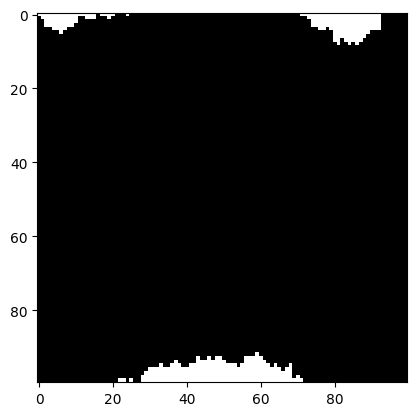

Press 'q' to quit, anything else to continue...


In [ ]:
from IPython.display import clear_output

for individual in final_pop:
    genome = individual.genome
    mask = np.zeros((SIDE_LEN, SIDE_LEN))
    mask = Generator._draw_line(mask, genome.start_point, genome.actions)

    drawer.draw(mask)
    plt.show()
    print("Press 'q' to quit, anything else to continue...")
    user_action = input()
    

    if user_action.lower() == "q":
        break
    clear_output()
    